In [6]:
library(stats)
library(quantmod)
library(forecast)
library(zoo)
library(xts)
library(tseries)
library(nortest)
library(forecast)

# I.S&P500 Daily Time series Data

In [7]:
getSymbols("^GSPC",from = "2009-01-01", to = "2020-12-31")

[1] "^GSPC"

# II.Log-returns of Time Series

In [8]:
AdjClose <- Ad(GSPC)
sp500 = AdjClose
log_ret = quantmod::periodReturn(sp500,period="daily", type="log")


***Mathematical equation to find log :  log(X/Y) = log(X) - log(Y) 

# III.Examine the ACF and PACF functions

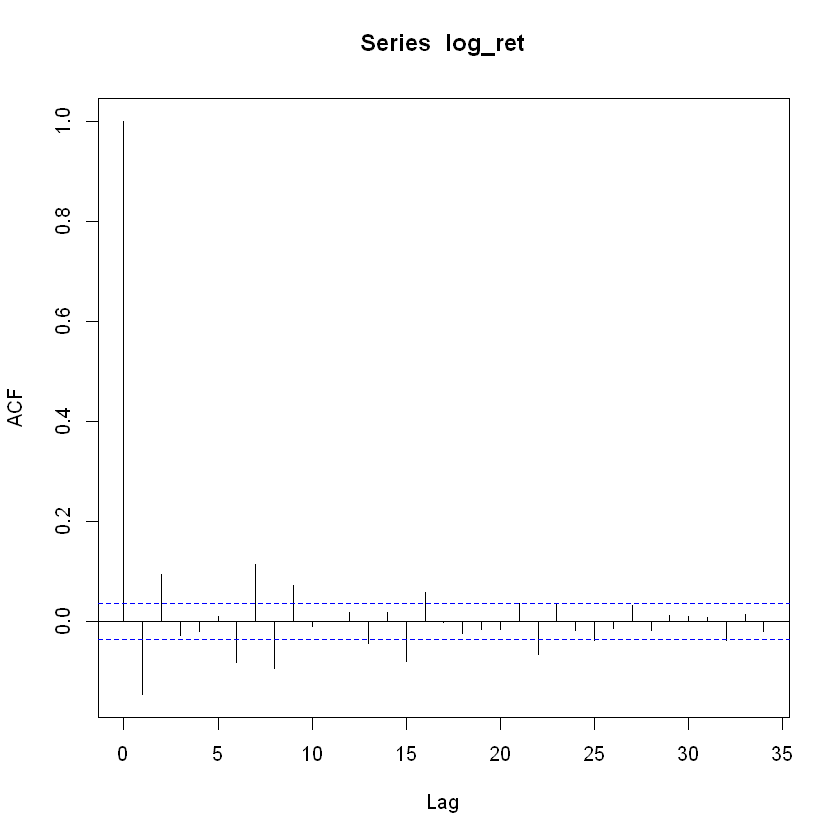

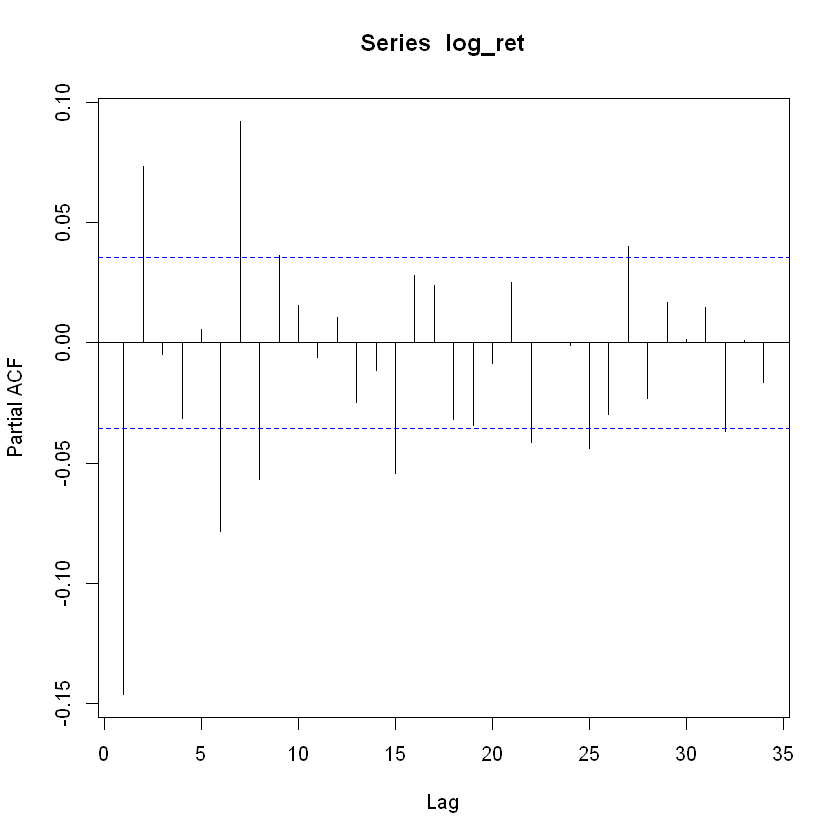

In [10]:
acf(log_ret)
pacf(log_ret)

In [ ]:
There are many significant spikes in both ACF and PACF.
In the biginning of the ACF there are three Significant spikes indiactes there autocorrelation betweens lags, 
The vertical lines between the dashed lines defined the white noise signal.
The ACF and the PACF both exhibiting large spikes indicates that there are both
autoregressive and moving averages processes.

# IV.Ljung-Box test and the test-hypothesis 

In [39]:
Box.test(log_ret, type = "Ljung-Box")


	Box-Ljung test

data:  log_ret
X-squared = 64.816, df = 1, p-value = 7.772e-16


Ljung-Box test is a statistical test to check if a time series contains an autocorrelation
The p-value=0.0000000000000007772 is less than 0.05 thus we can reject the null hypothesis, indicating the time series contains significant autocorrelations, whereas a p-value exceeding 0.05 provides no such evidence.

# V.Check the data for stationarity using the correct test statistic and comment on the output

Warning message in adf.test(log_ret):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  log_ret
Dickey-Fuller = -15.41, Lag order = 14, p-value = 0.01
alternative hypothesis: stationary


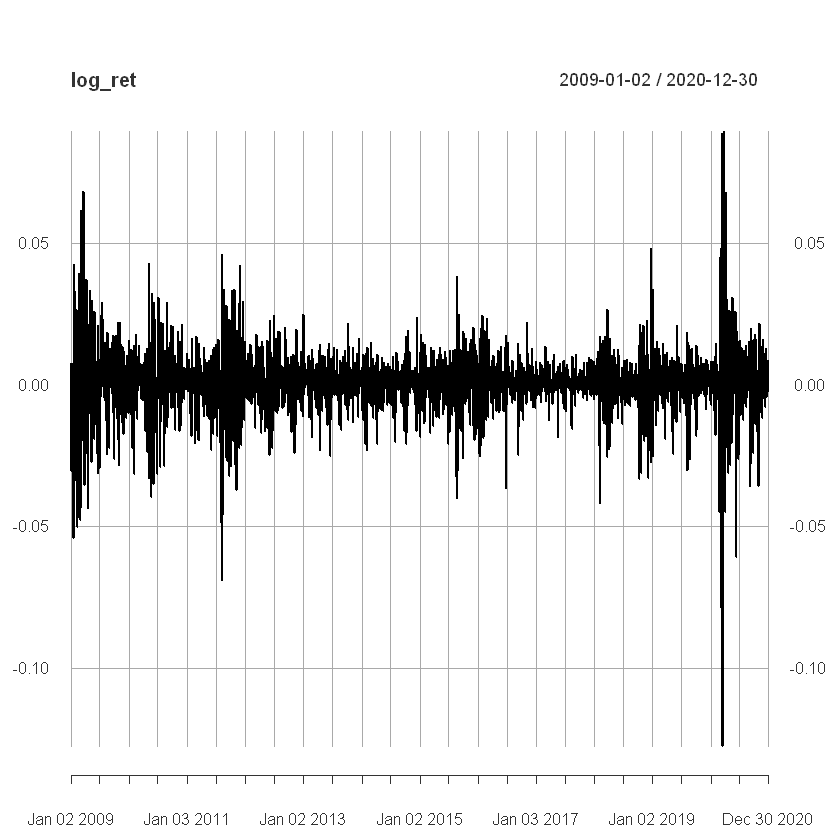

In [58]:
plot(log_ret)
adf.test(log_ret)


From above graph and Augmented Dickey-Fuller test we can notice that there is stationarity presents in time series.
There is no unit-root in the time series, meaning that the time series is stationary and p-value is very small less than 0.05
implies we can reject the null hypothesis.

# VI.	Perform a normality test of your choice on the return series and report the output. Write down the hypothesis test and comment on the p-value

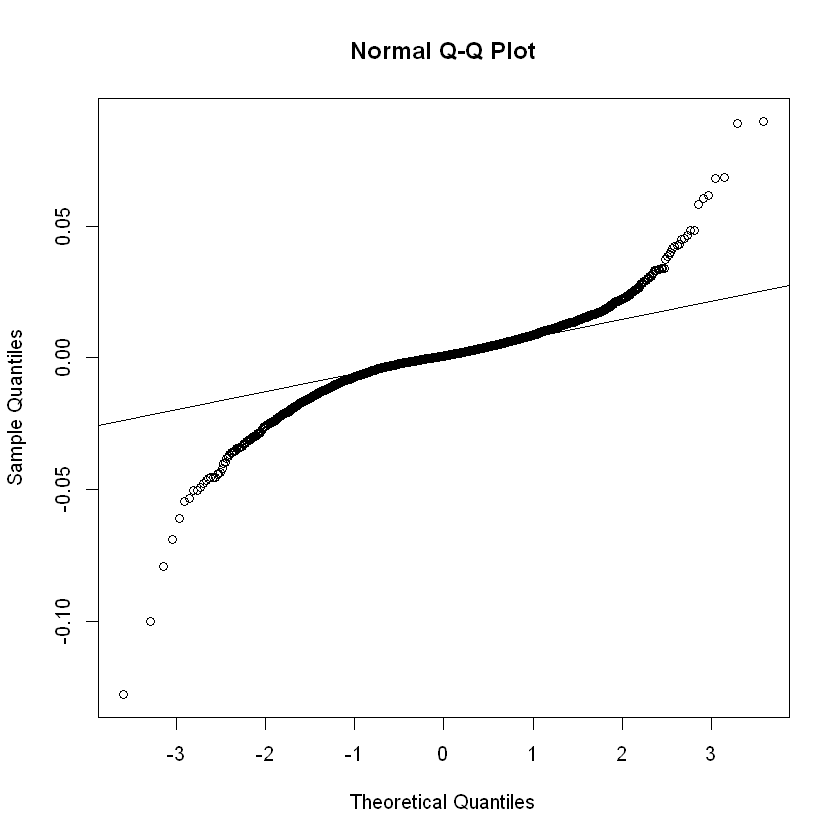

In [18]:
qqnorm(log_ret)
qqline(log_ret)

In [19]:
sf.test(log_ret)


	Shapiro-Francia normality test

data:  log_ret
W = 4.8722e-05, p-value < 2.2e-16


From above QQ-plot It can be notice that the dataset points are far from the normal line in both ends of the curve, which means that this time series is not normal. 
Since the shapiro wilk test p-value is < 0.05 that we can conclude that we can reject the null hypothesis, which means that our distribution is not normal.

# VII.Fit an ARIMA model and determine the correct lag order: Show the 1-liner codes for output.

ARIMA mathematical equation: Yt=α+β1Yτ-1+1Yτ-2+⋯+βpYτ-pϵτ+Φ1ϵτ-1+Φ2ϵτ-2+⋯+Φqϵτ-q

In [164]:
ARMA_Model = arima(log_ret, order= c(3,0,3))
summary(ARMA_Model)


Call:
arima(x = log_ret, order = c(3, 0, 3))

Coefficients:
          ar1     ar2     ar3     ma1      ma2      ma3  intercept
      -0.6900  0.8031  0.8469  0.5695  -0.8149  -0.7546      4e-04
s.e.   0.0298  0.0193  0.0300  0.0370   0.0251   0.0402      0e+00

sigma^2 estimated as 0.0001297:  log likelihood = 9228.47,  aic = -18440.95

Training set error measures:
                       ME       RMSE         MAE  MPE MAPE      MASE
Training set 0.0001421706 0.01138757 0.007486327 -Inf  Inf 0.6647237
                     ACF1
Training set -0.004223549

In [236]:
ARMA_Model = arima(log_ret, order= c(15,1,3))
summary(ARMA_Model)


Call:
arima(x = log_ret, order = c(15, 1, 3))

Coefficients:
          ar1      ar2      ar3     ar4      ar5      ar6     ar7      ar8
      -0.4237  -0.7151  -0.0764  0.0266  -0.0241  -0.0759  0.0519  -0.0676
s.e.   0.1245   0.0827   0.0268  0.0243   0.0239   0.0238  0.0251   0.0266
         ar9     ar10    ar11    ar12     ar13     ar14     ar15      ma1
      0.0800  -0.0149  0.0291  0.0185  -0.0219  -0.0178  -0.0759  -0.6958
s.e.  0.0256   0.0246  0.0241  0.0239   0.0239   0.0218   0.0192   0.1243
         ma2      ma3
      0.4456  -0.7498
s.e.  0.1478   0.0797

sigma^2 estimated as 0.000129:  log likelihood = 9230.4,  aic = -18422.81

Training set error measures:
                       ME       RMSE        MAE  MPE MAPE      MASE
Training set 0.0001398399 0.01135658 0.00747697 -Inf  Inf 0.6638929
                      ACF1
Training set -6.394352e-05

In [237]:
Box.test(ARMA_Model$resid,lag=5, type = "Ljung-Box")
Box.test(ARMA_Model$resid,lag=10, type = "Ljung-Box")
Box.test(ARMA_Model$resid,lag=15, type = "Ljung-Box")
Box.test(ARMA_Model$resid,lag=30, type = "Ljung-Box")


	Box-Ljung test

data:  ARMA_Model$resid
X-squared = 0.003798, df = 5, p-value = 1



	Box-Ljung test

data:  ARMA_Model$resid
X-squared = 0.072399, df = 10, p-value = 1



	Box-Ljung test

data:  ARMA_Model$resid
X-squared = 0.24795, df = 15, p-value = 1



	Box-Ljung test

data:  ARMA_Model$resid
X-squared = 20.587, df = 30, p-value = 0.9004


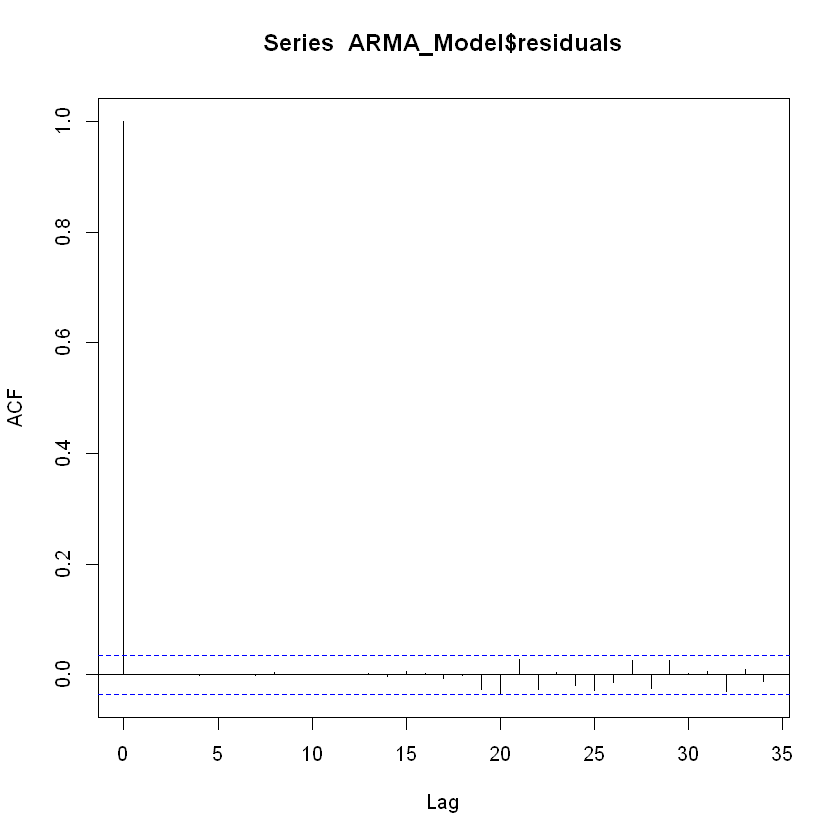

In [238]:
acf(ARMA_Model$residuals)

The ACF and the PACF both exhibiting large spikes in the biggning indicates that there are both
autoregressive and moving averages processes with first difference time series so our model lag order is as ARMA(p,1,q)=ARMA(15,1,3).

# VIII.	Report the coefficients for the chosen ARIMA model and show the respective equation given these coefficients

Yt=α+β1Yτ-1+1Yτ-2+⋯+βpYτ-pϵτ+Φ1ϵτ-1+Φ2ϵτ-2+⋯+Φqϵτ-q

β1 = ar1

# The residuals from an ARIMA fit require that: 
a. The residuals have zero mean E[e_t ]=0  
b. Have a finite variance Var[e_t ]=σ^2
c. Have zero autocovariance E[  〖e_t e〗_(τ ) ]=0 
Using the results from checkresiduals(fitted_model) function comment on the above 


	Ljung-Box test

data:  Residuals from ARIMA(15,1,3)
Q* = 8.3617, df = 3, p-value = 0.0391

Model df: 18.   Total lags used: 21



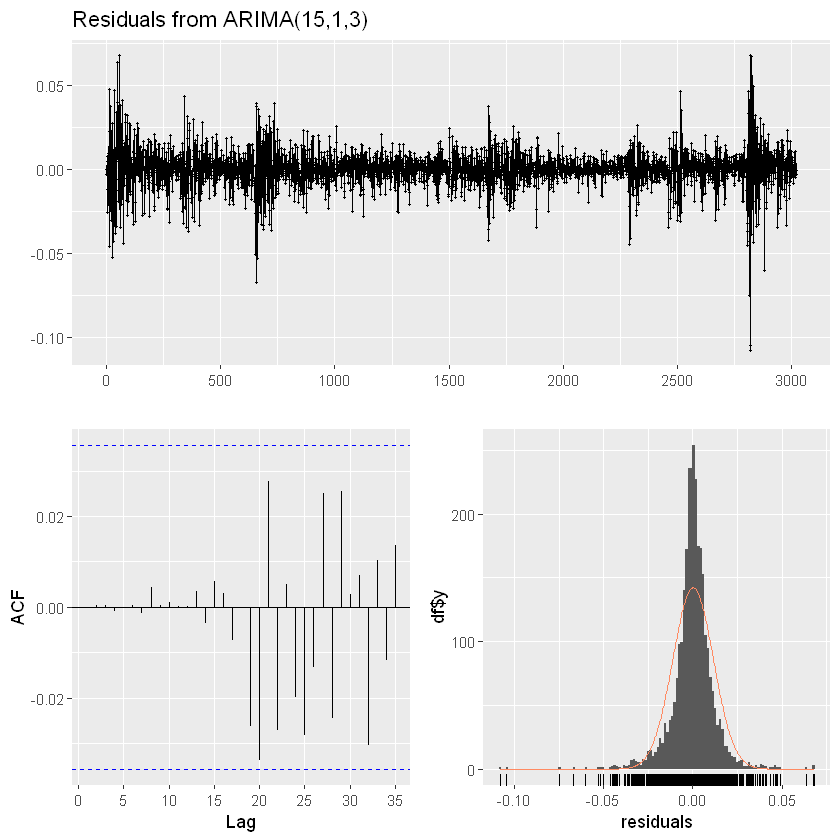

In [239]:
checkresiduals(ARMA_Model)

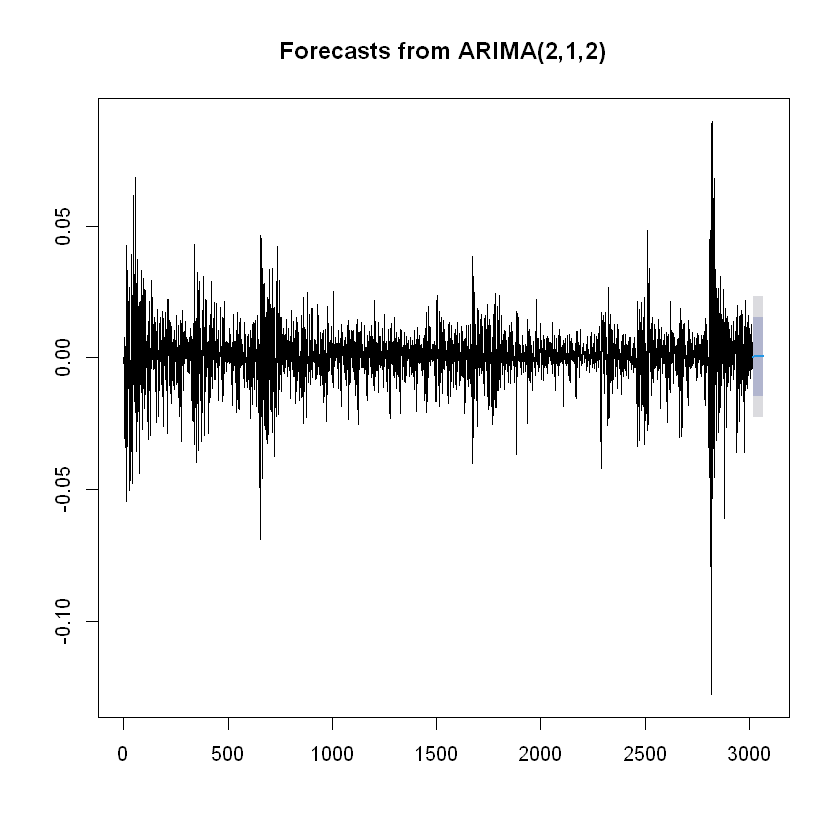

In [240]:
Mymodel=forecast(ARIMA_Model, h=50)
plot(Mymodel)